In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [9]:
from svm import SVM

In [10]:
X , y = datasets.make_blobs(n_samples=50 , n_features=2 , centers=2 , cluster_std=1.05 , random_state=42)
y = np.where(y == 0 , -1 , 1)

In [11]:
classification = SVM()
classification.fit(X , y)
predictions = classification.predict(X)

In [12]:
print(classification.w , classification.b)

[ 0.52735146 -0.08786235] -0.2630000000000002


In [13]:
def visualize_svm():
    def get_hyperplane_value(x , w , b , offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0] , X[:,1] , marker='o' , c=y)

    x0_1 , x0_2 = np.amin(X[:,0]) , np.amax(X[:,0])
    x1_1 , x1_2 = get_hyperplane_value(x0_1 , classification.w , classification.b , 0) , get_hyperplane_value(x0_2 , classification.w , classification.b , 0)
    
    x1_1_m , x1_2_m = get_hyperplane_value(x0_1 , classification.w , classification.b , -1) , get_hyperplane_value(x0_2 , classification.w , classification.b , -1)
    x1_1_p , x1_2_p = get_hyperplane_value(x0_1 , classification.w , classification.b , 1) , get_hyperplane_value(x0_2 , classification.w , classification.b , 1)

    ax.plot([x0_1,x0_2] , [x1_1,x1_2] , 'y--')
    ax.plot([x0_1,x0_2] , [x1_1_m,x1_2_m] , 'k')
    ax.plot([x0_1,x0_2] , [x1_1_p,x1_2_p] , 'k')

    x1_min , x1_max = np.amin(X[:,1]) , np.amax(X[:,1])
    ax.set_ylim([x1_min-3 , x1_max+3])

    plt.show()

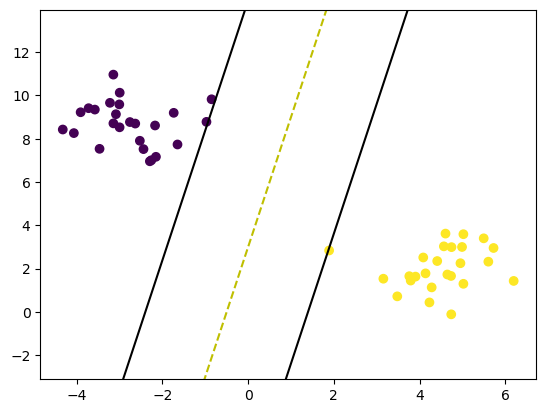

In [14]:
visualize_svm()